# TUGAS PRAKTIKUM

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [148]:
import numpy as np
from pathlib import Path
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cv2


In [149]:
train_dir = "images/training/"
test_dir = "images/test/"

In [150]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = cv2.imread(str(file))

            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [151]:
train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)


In [164]:
def extract_histogram(image, bins=256):
    # Ubah gambar menjadi grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Hitung histogram grayscale
    hist = cv2.calcHist([gray_image], [0], None, [bins], [0, 256])
    
    # Normalisasi histogram
    hist = cv2.normalize(hist, hist).flatten()
    
    return hist

In [165]:
def extract_features(img_list):
    features = []
    labels = []
    for img, label in img_list:
        hist = extract_histogram(img)
        features.append(hist)
        labels.append(1 if label == 'day' else 0)  # Encode label: siang=1, malam=0
    return np.array(features), np.array(labels)

In [166]:
X_train, y_train = extract_features(train_img)
X_test, y_test = extract_features(test_img)

In [167]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
# Melatih model SVM
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [179]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Accuracy on train Histogram: {train_acc}")
print(f"Accuracy on test Histogram:: {test_acc}")

print("Classification Report : ")
print(classification_report(y_test, y_test_pred, target_names=["Day", "Night"]))

Accuracy on train Histogram: 1.0
Accuracy on test Histogram:: 0.95
Classification Report : 
              precision    recall  f1-score   support

         Day       0.96      0.94      0.95        80
       Night       0.94      0.96      0.95        80

    accuracy                           0.95       160
   macro avg       0.95      0.95      0.95       160
weighted avg       0.95      0.95      0.95       160



In [176]:
def plot_histogram(image):
    colors = ('b', 'g', 'r')  # Urutan saluran warna
    plt.figure(figsize=(10, 5))
    
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    
    plt.title('Histogram of RGB Channels')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

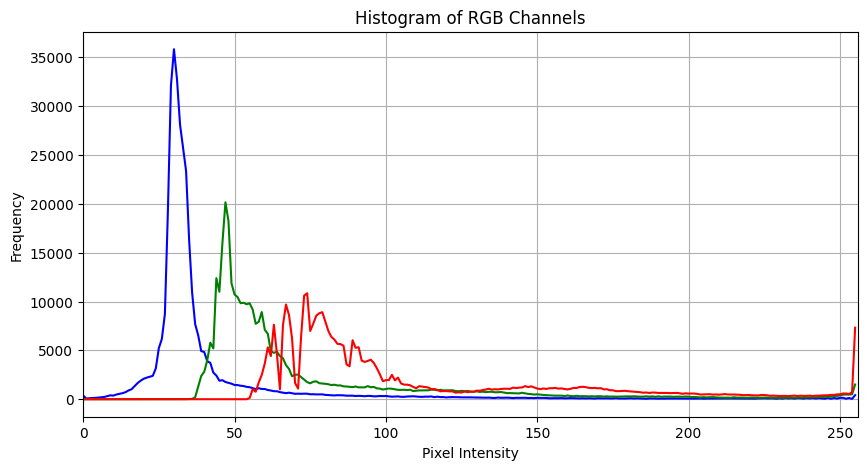

In [177]:
random_image = train_img[np.random.randint(0, len(train_img))][0]  # Ambil gambar acak
plot_histogram(random_image)